<h2>O que é o NPS?</h2>
O Net Promoter Score, ou NPS, é uma metodologia criada por Fred Reichheld nos EUA, com o objetivo de realizar a mensuração do Grau de Lealdade dos Consumidores de qualquer tipo de empresa.

Neste notebook vamos implementar um Fuzzy Control System para saber se um determinado cliente pode ser um promotor, neutro ou detrator.

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl # facilita nossa  vida

In [15]:
#Estabelecendo os objetos Antecedent/Consequent
# Escolhi como pergunta de pesquisa: "Logo após a compra: de 0 a 10 como foi sua experiência com a nossa empresa?"
#                                    "De 0 a 10 o quanto você recomendaria nosso produto para um amigo?"

satisfacao   = ctrl.Antecedent(np.arange(0, 11, 1), 'satisfacao')
recomendacao = ctrl.Antecedent(np.arange(0, 11, 1), 'recomendacao') 
cliente = ctrl.Consequent(np.arange(0, 11, 1), 'cliente')

In [16]:
satisfacao.automf(3)
recomendacao.automf(3)

In [25]:
cliente['detrator'] = fuzz.trimf(clinte.universe, [0, 0, 5])
cliente['neutro']      = fuzz.trimf(clinte.universe, [0, 5, 10])
cliente['promotor']    = fuzz.trimf(clinte.universe, [5, 10, 10])

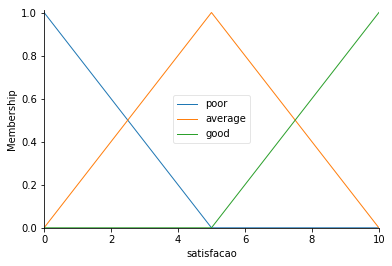

In [26]:
# Visualizando
satisfacao.view() #pensar em mudar nome de categorias dps

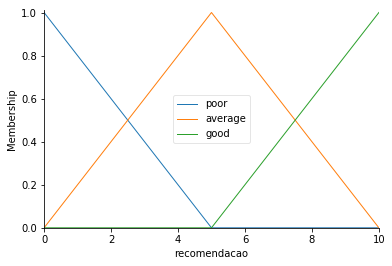

In [27]:
recomendacao.view()

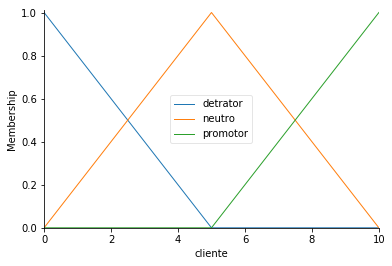

In [28]:
cliente.view() # categorização de clientes sao muito separatistas

In [30]:
# Definir as regras (pensar em mais/melhores regras depois)
rule1 = ctrl.Rule(recomendacao['good'], cliente['promotor'])
rule2 = ctrl.Rule(recomendacao['poor'], cliente['detrator'])
rule3 = ctrl.Rule(recomendacao['average'] | satisfacao['average'], cliente['neutro'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc84cb5cdd8>)

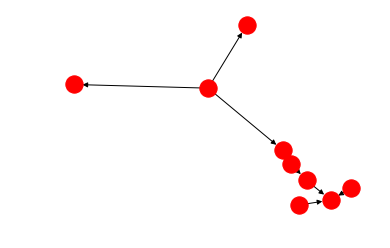

In [32]:
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc84cad6320>)

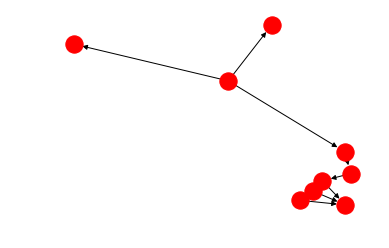

In [33]:
rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc84cb4f128>)

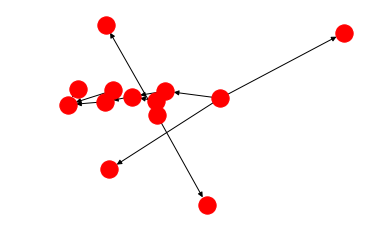

In [34]:
rule3.view()

In [36]:
# Criando sistema  de  controle
cliente_tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
cliente_tipping = ctrl.ControlSystemSimulation(cliente_tipping_ctrl)

In [40]:
# Supondo que satisfação = 8 e recomendacao = 10
cliente_tipping.input['satisfacao'] = 8.0
cliente_tipping.input['recomendacao'] = 10.0

cliente_tipping.compute()

6.185185185185186


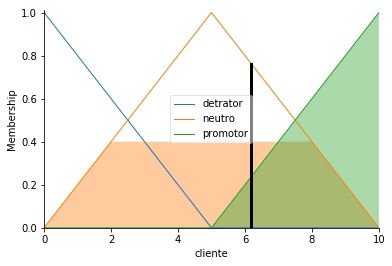

In [41]:
print(cliente_tipping.output['cliente'])
cliente.view(sim=cliente_tipping)

5.000000000000001


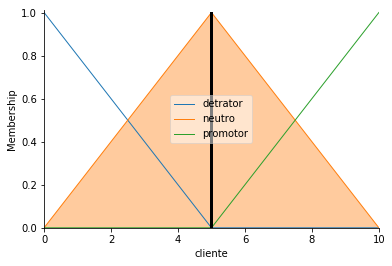

In [42]:
# Supondo que satisfação = 5 e recomendacao = 5
cliente_tipping.input['satisfacao'] = 5.0
cliente_tipping.input['recomendacao'] = 5.0

cliente_tipping.compute()
print(cliente_tipping.output['cliente'])
cliente.view(sim=cliente_tipping)

4.6231884057971016


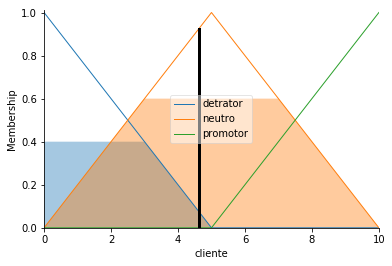

In [43]:
# Supondo que satisfação = 1 e recomendacao = 3
cliente_tipping.input['satisfacao'] = 1.0
cliente_tipping.input['recomendacao'] = 3.0

cliente_tipping.compute()
print(cliente_tipping.output['cliente'])
cliente.view(sim=cliente_tipping)

6.809523809523811


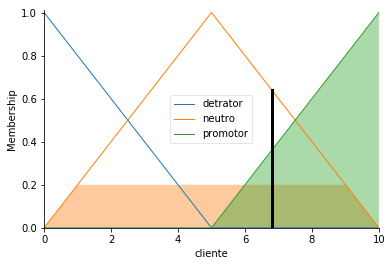

In [44]:
# Supondo que satisfação = 9 e recomendacao = 10
cliente_tipping.input['satisfacao'] = 9.0
cliente_tipping.input['recomendacao'] = 10.0

cliente_tipping.compute()
print(cliente_tipping.output['cliente'])
cliente.view(sim=cliente_tipping)